In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline
import matplotlib.image as mpimg

In [2]:
import cv2

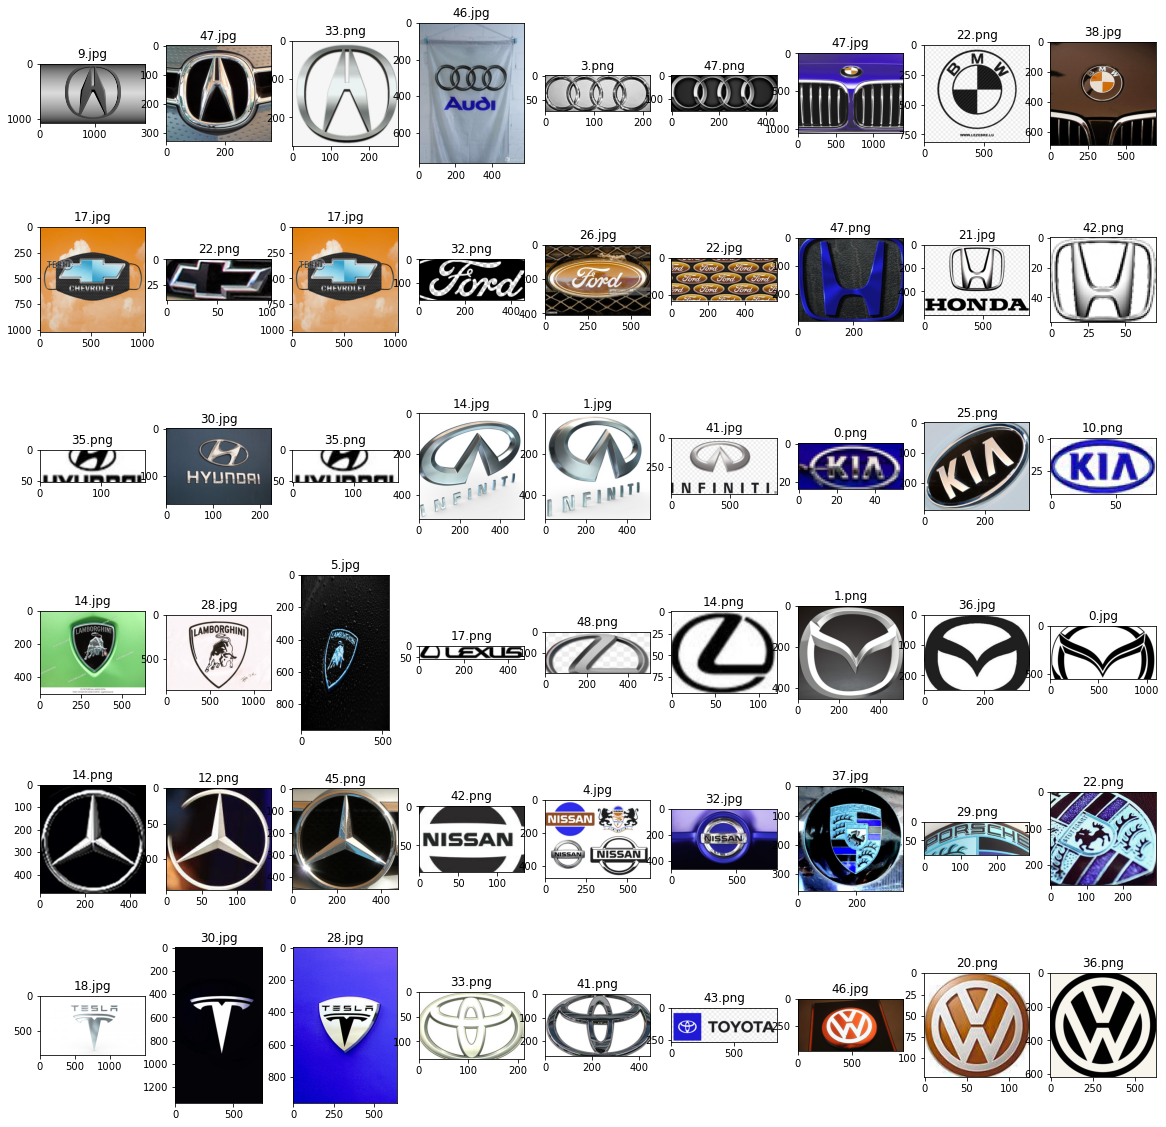

In [3]:
# Sample input train images
plt.figure(figsize=(20,20))
img_folder=r'Train1'
ele = 0
for car in os.listdir(img_folder):
    path = os.path.join(img_folder,car)
    for i in range(3):   
        ele += 1
        file = np.random.choice(os.listdir(path))
        image_path= os.path.join(path, file)
        img = cv2.imread(image_path)
        ax=plt.subplot(6,9,ele)
        ax.title.set_text(file)
        plt.imshow(img)

In [9]:
# As it can be seen from the above images, some are big while some are small, some are plain logos while few also have car and are flipped
# For flipped images, image augmentation has to be carried out to orient then correctly. Average size of the image has to be found to have all the images with same size.

In [4]:
# Calculating mean height and width of the images
width = []
height = []
for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):       
            image_path= os.path.join(img_folder, dir1,  file)
            image = cv2.imread(image_path)            
            width.append(image.shape[0])
            height.append(image.shape[1])

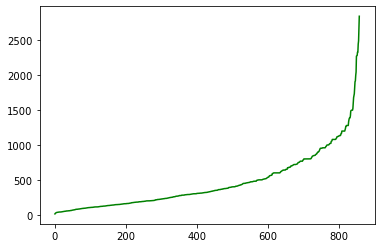

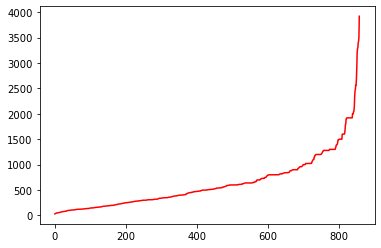

In [5]:
# Plotting width and height value range
width.sort()
height.sort()
x = range(len(width))
plt.plot(x,width,'g') 
plt.show()
plt.plot(x,height,'r') 
plt.show()

In [6]:
# Mean calculation
mean_w = sum(width)//len(width)
mean_h = sum(height)//len(height)
print(mean_w, ",",mean_h)

461 , 634


In [7]:
# Setting image height and width
IMG_WIDTH=400
IMG_HEIGHT=600

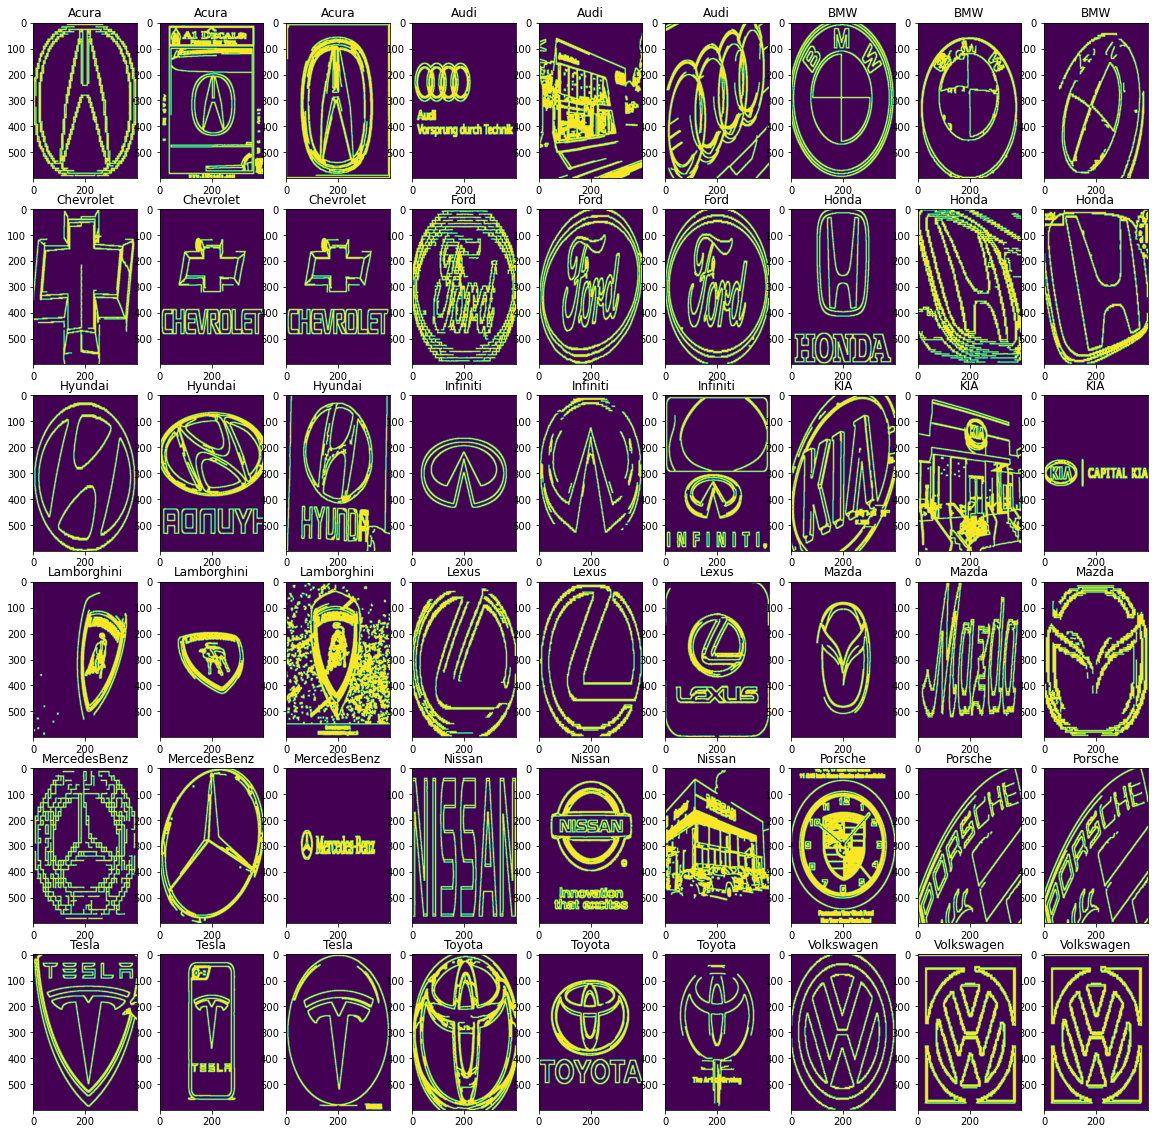

In [8]:
# Plotting preprocessed images
plt.figure(figsize=(20,20))
img_folder=r'Train1'
ele = 0
for car in os.listdir(img_folder):
    path = os.path.join(img_folder,car)
    for i in range(3):   
        ele += 1
        file = np.random.choice(os.listdir(path))
        image_path= os.path.join(path, file)
        image= cv2.imread(image_path, cv2.COLOR_BGR2GRAY)    # input gray image             
        image=cv2.resize(image, (IMG_WIDTH,IMG_HEIGHT),interpolation = cv2.INTER_AREA) # resize the image
        img_blur = cv2.GaussianBlur(image, (3, 3), 0) # Gaussian blur the image
        edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)  # Canny Edge Detection
        kernel = np.ones((5,5), np.uint8)
        image = cv2.dilate(edges, kernel, iterations=1) 
        ax=plt.subplot(6,9,ele)
        ax.title.set_text(car)
        plt.imshow(image)